## Import the Packages

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

pd.options.display.max_columns=100
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore")

#### Sample / Referece: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression

## Import the Dataset
* insurance.csv 
* Target variable is "charges"

In [2]:
titanic = pd.read_csv('insurance.csv')

In [3]:
titanic.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning + EDA (Exploratory Data Analysis)

In [4]:
titanic.shape

(1338, 7)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
titanic.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

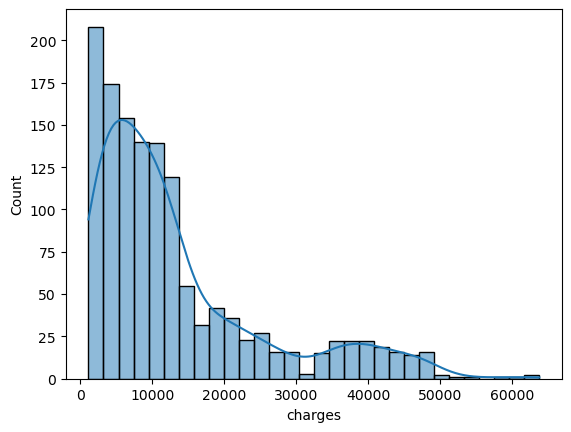

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(titanic['charges'], kde = True)

In [ ]:
# left skewed distribution

In [9]:
titanic.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
titanic_columns = [column for column in titanic.columns if column not in ['charges']]
titanic_columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [20]:
for column in ['sex', 'children', 'smoker', 'region']:
    print(titanic[column].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
# all the input variables seem to have different values

In [28]:
num_features = titanic[['age', 'bmi', 'children', 'charges']]
cat_features = titanic[['sex', 'smoker', 'region']]

<Axes: >

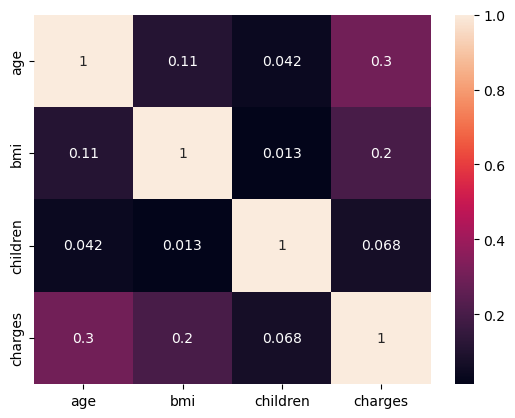

In [29]:
#checking for the correlation between the features
corr = num_features.corr()
sns.heatmap(corr, annot = True)

In [ ]:
# there is no high correlation between the features

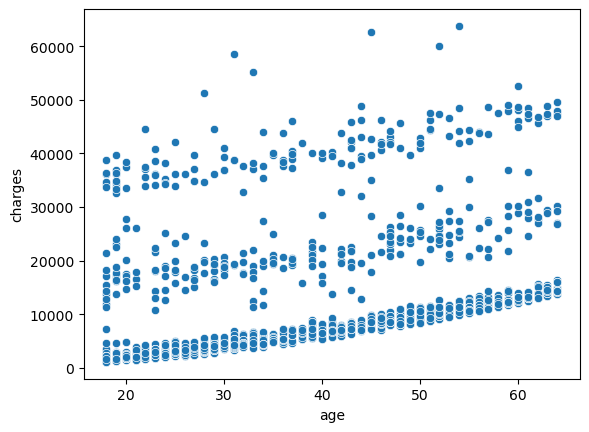

In [30]:
sns.scatterplot(x = 'age', y = 'charges', data = titanic)
plt.show()

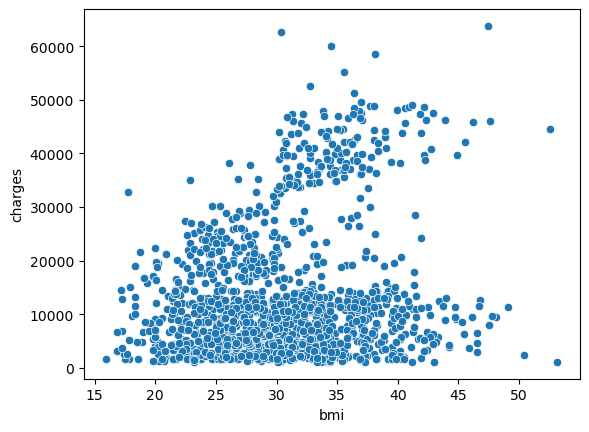

In [31]:
sns.scatterplot(x = 'bmi', y = 'charges', data = titanic)
plt.show()

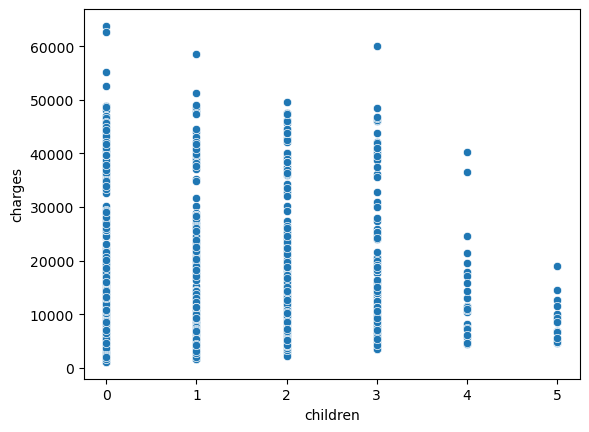

In [32]:
sns.scatterplot(x = 'children', y = 'charges', data = titanic)
plt.show()

## Handle null values, Outlier, OneHot, etc.

## Feature Engineering

## Feature Reduction / Selection

## Modelling
* **(Linear, Ridge, Lasso, and Elastic + Simple Average Ensemble)**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, PoissonRegressor

In [ ]:
# feat_list -> Final feature list that will be used in modelling 
# Target -> Y column name

In [ ]:
X_train,Y_train = data[data.target_category==1][feat_list], data[data.target_category==1][Target]
X_test,Y_test = data[data.target_category==2][feat_list], data[data.target_category==1][Target]

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
mylinear= LinearRegression.fit(X_train,Y_train)

In [ ]:
## test the model
Y_pred = mylinear.predict(X_test)

In [ ]:
mylinear.get_params()

## Model Evaluation

In [ ]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(Y_test, Y_pred)


In [ ]:
rmse

## Model and data saving